In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV,cross_val_score,RandomizedSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,average_precision_score
from sklearn.metrics import adjusted_mutual_info_score,balanced_accuracy_score,roc_curve,auc

In [11]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv") 
df.sample(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
8218,39,Private,444219,HS-grad,9,Married-civ-spouse,Craft-repair,Wife,Black,Female,0,0,45,United-States,<=50K
4497,35,Private,150125,Assoc-voc,11,Divorced,Other-service,Unmarried,Black,Female,0,0,40,United-States,<=50K
1539,26,State-gov,197156,HS-grad,9,Divorced,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K
24279,82,Self-emp-inc,130329,7th-8th,4,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
18704,37,Self-emp-not-inc,29054,Assoc-voc,11,Never-married,Farming-fishing,Own-child,White,Male,0,0,84,United-States,<=50K
31601,25,Private,421467,Assoc-acdm,12,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,26,United-States,<=50K
32322,32,Private,188246,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
22848,18,Private,115443,11th,7,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18319,38,Private,39606,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
29818,52,?,244214,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,35,United-States,<=50K


In [3]:
df.shape


(32560, 15)

In [5]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

<AxesSubplot:>

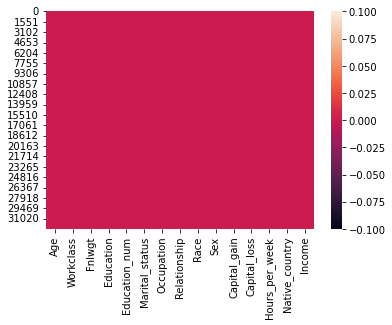

In [7]:
sns.heatmap(df.isnull())


In [8]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [13]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [9]:
df.isin([' ?']).sum()


Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

Replacing ? values with Mode of the object columns

In [12]:
for col in ['Workclass', 'Occupation', 'Native_country']:
    df[col]=df[col].replace(' ?', df[col].mode()[0])

In [14]:
int_list=list(df.select_dtypes(['int64']).columns)


# Univariate Analysis



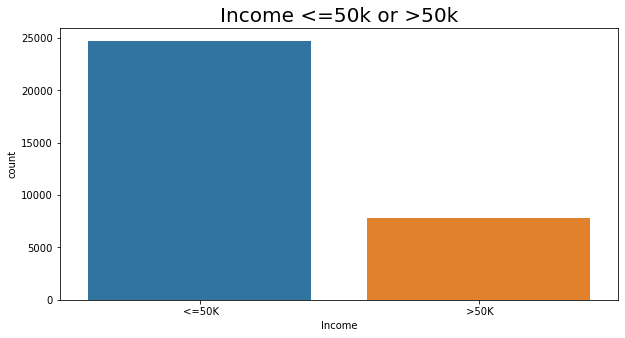

In [15]:
plt.figure(figsize = (10,5)) 
sns.countplot(x="Income", data=df) 
plt.title("Income <=50k or >50k", fontsize = 20)
plt.show()

People who earned less than or equal to 50k have more number than people who earned more than 50k



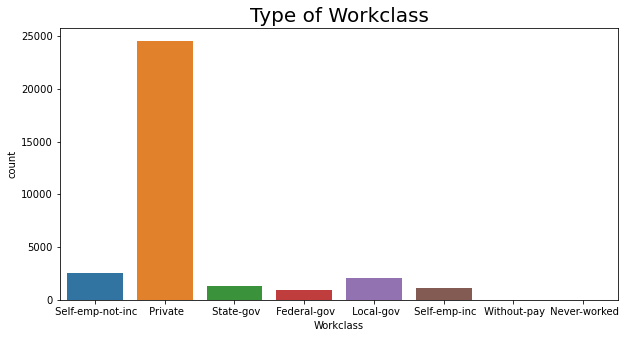

In [16]:
plt.figure(figsize = (10,5))
sns.countplot(x="Workclass", data=df)
plt.title("Type of Workclass", fontsize = 20)
plt.show()


Private Employee participated more



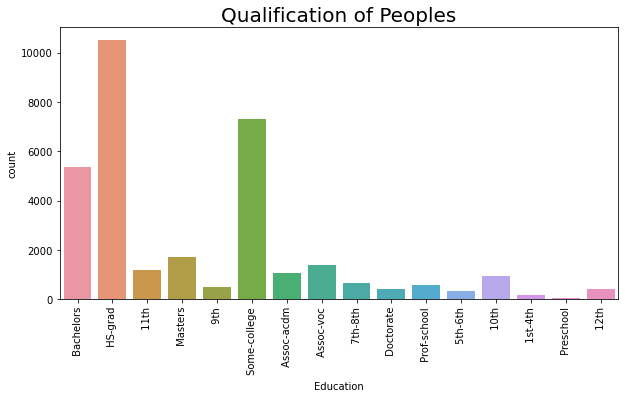

In [17]:
plt.figure(figsize = (10,5))
ax=sns.countplot(x="Education", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Qualification of Peoples", fontsize = 20)
plt.show()


The person who did HS-Grad is earning more than others



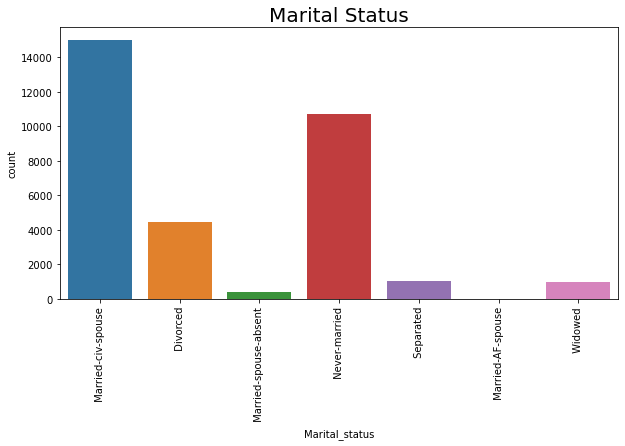

In [18]:
plt.figure(figsize = (10,5))
ax=sns.countplot(x="Marital_status", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Marital Status", fontsize = 20)
plt.show()


Married-civ-spouse have more income than others



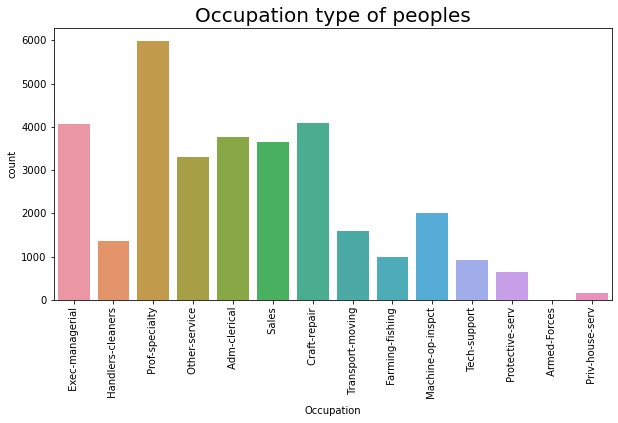

In [19]:
plt.figure(figsize = (10,5))
ax=sns.countplot(x="Occupation", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Occupation type of peoples", fontsize = 20)
plt.show()

People who's occupation is Prof-specialty have more number than others Occupation peoples.



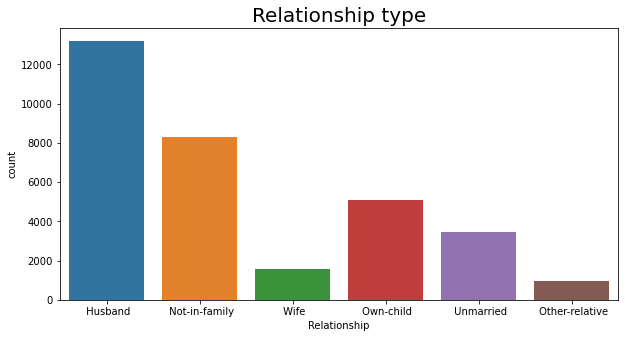

In [23]:
plt.figure(figsize = (10,5))
sns.countplot(x="Relationship", data=df)
plt.title("Relationship type", fontsize = 20)
plt.show()

Husband are earning more than any other person of family



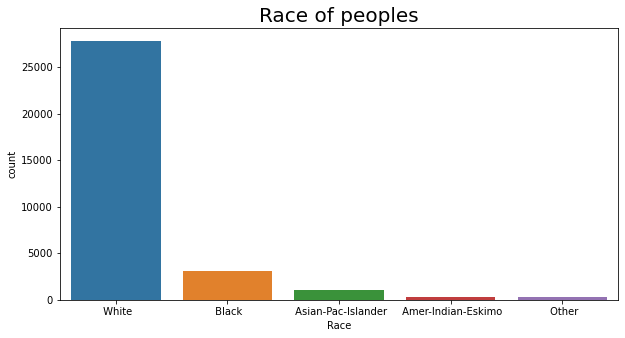

In [24]:
plt.figure(figsize = (10,5))
sns.countplot(x="Race", data=df)
plt.title("Race of peoples", fontsize = 20)
plt.show()

White peoples have more earning than other race of peoples



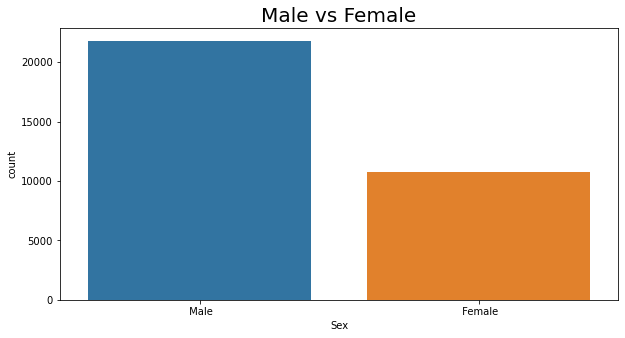

In [25]:
plt.figure(figsize = (10,5))
sns.countplot(x="Sex", data=df)
plt.title("Male vs Female", fontsize = 20)
plt.show()

Male earning more than Female



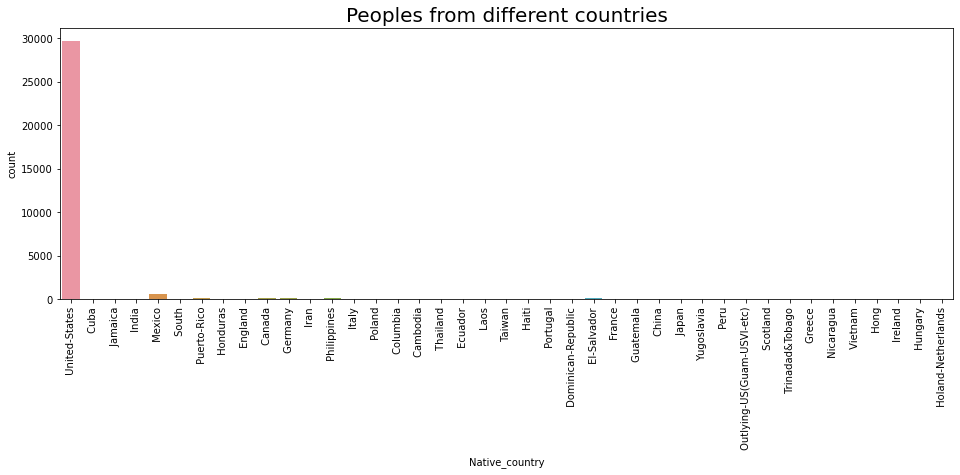

In [26]:
plt.figure(figsize = (16,5))
ax = sns.countplot(x="Native_country", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Peoples from different countries", fontsize = 20)
plt.show()

United-States peoples are earning more than other country peoples



# Bi-variate Analysis


<AxesSubplot:xlabel='Income', ylabel='Age'>

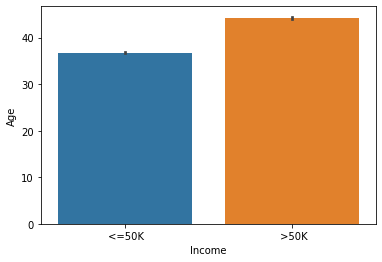

In [27]:
sns.barplot(x = 'Income', y = 'Age', data = df)


People who have age less than 40 are earning less than 50k and people who have age more than 40 are earning more than 50k



<AxesSubplot:xlabel='Income', ylabel='Capital_gain'>

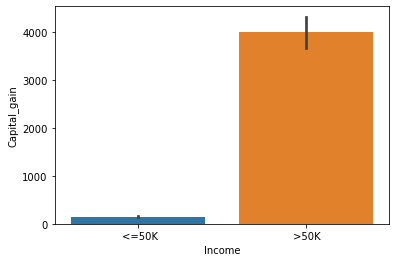

In [28]:
sns.barplot(x = 'Income', y = 'Capital_gain', data = df)


we can see capital gain are less with less income

<AxesSubplot:xlabel='Income', ylabel='Education_num'>

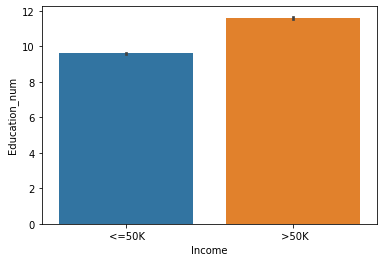

In [29]:
sns.barplot(x = 'Income', y = 'Education_num', data = df)


If Education num is less than 10 than income is less than 50k, If Education num is more than 11 than income will be more than 50k.



<AxesSubplot:xlabel='Income', ylabel='Capital_loss'>

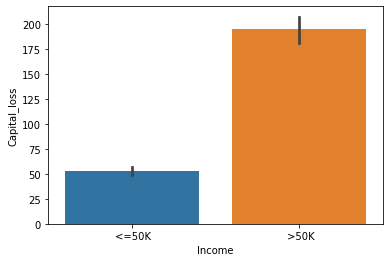

In [30]:
sns.barplot(x = 'Income', y = 'Capital_loss', data = df)


more the income, more the capital loss

<AxesSubplot:xlabel='Income', ylabel='Hours_per_week'>

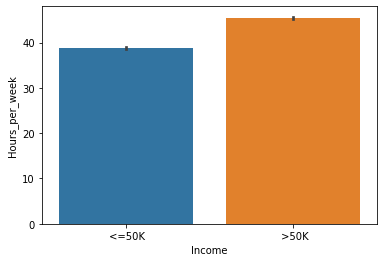

In [31]:
sns.barplot(x = 'Income', y = 'Hours_per_week', data = df)


If hours per week is less than 40 then Income will be less than 50k, If hours per week is more than 40 then Income will be more than 50k



In [34]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Capital_gain and Capital_loss have min values 0 and 25,50 and 75% values are Zeros.

There is much difference in values of different columns, so we'll do scaling.

In [35]:
label_list=list(df.select_dtypes(['object']).columns)  
le=LabelEncoder() 
for i in label_list:
    df[i] = le.fit_transform(df[i])

In [36]:
df.head()


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0


shuffling the dataset This will Shuffle our dataset and it will avoid biasness of prediction



In [37]:
df = df.sample(frac=1, random_state = 0)


Multi-Variate Analysis


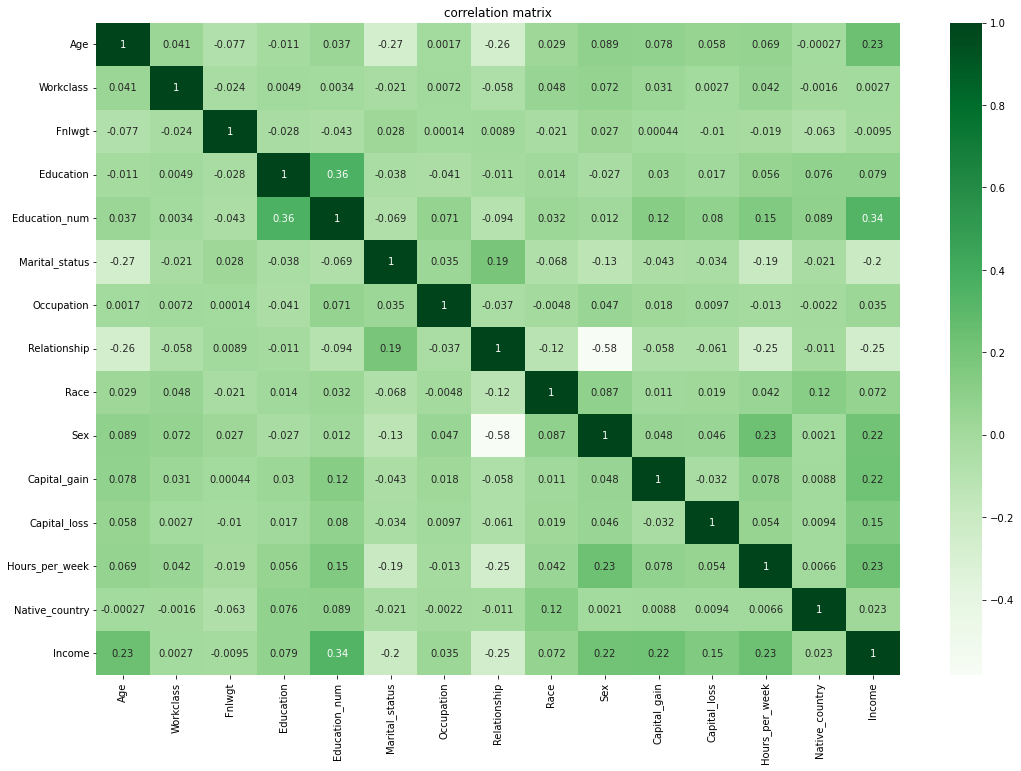

In [42]:
fig=plt.figure(figsize=(18,12))
hc=df.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap="Greens")
plt.title("correlation matrix")
plt.show()

We can clearly see that there is not much correlation, even though Education_num have heighst corelation i.e. 34%



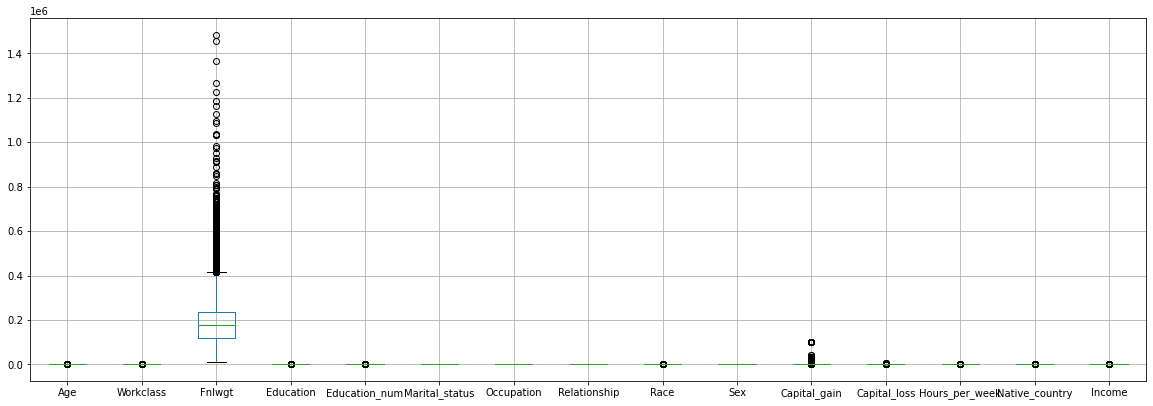

In [43]:
df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

we can see some outliers

using zscore to deal with outliers

In [46]:
z=np.abs(zscore(df))
print(np.where(z>3))

(array([    2,     4,     9, ..., 32539, 32547, 32551], dtype=int64), array([13, 12,  0, ...,  8, 10,  8], dtype=int64))


In [47]:
df1=df[(z<3).all(axis = 1)]
print(df.shape)
print(df1.shape)

(32560, 15)
(27770, 15)


In [48]:
loss_percent=(32559-27769)/32559*100
print(loss_percent)

14.7117540465002


More than 14% of data we have to drop but this much amount of data is not good to drop.



# skewness

In [49]:
x = df.drop("Income", axis=1)
y = df["Income"]

In [50]:
x.skew()


Age                0.558738
Workclass          0.076178
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.000536
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -4.243083
dtype: float64

In [51]:
PT=PowerTransformer() 
for i in int_list:
    if abs(x.loc[:,i].skew())>0.55:
        x.loc[:,i]=PT.fit_transform(x.loc[:,i].values.reshape(-1,1))

# Scaling


In [52]:
scale = MinMaxScaler() 
new = scale.fit(x)  
scale_x = new.transform(x) 

scaled_x = pd.DataFrame(scale_x, index=x.index, columns=x.columns)
x=scaled_x
x.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
22278,0.476686,0.571429,0.336528,1.000000,0.6,0.333333,0.307692,0.0,1.0,1.0,0.0,0.0,0.397959,0.95
8950,0.561811,0.428571,0.330628,1.000000,0.6,0.666667,0.230769,0.8,1.0,0.0,0.0,0.0,0.448980,0.95
7838,0.362885,0.428571,0.345955,0.333333,0.2,0.833333,0.692308,0.2,1.0,1.0,0.0,0.0,0.397959,0.30
16505,0.110668,0.428571,0.327069,1.000000,0.6,0.666667,0.000000,0.6,1.0,0.0,0.0,0.0,0.153061,0.95
19140,0.718571,0.428571,0.228073,0.333333,0.2,0.333333,0.538462,1.0,1.0,0.0,0.0,0.0,1.000000,0.95


In [53]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu," on Random_state ",maxRS)

Best accuracy is 0.8249385749385749  on Random_state  101


Spliting Train and Test data

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)


In [57]:
model=[LogisticRegression(),KNeighborsClassifier(),BernoulliNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('accuracy score of ->', m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m,x,y,cv=5)
    print(score)
    print(score.mean())
    print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,pred)-score.mean())

accuracy score of -> LogisticRegression()
0.8249385749385749
[[6988  453]
 [1257 1070]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7441
           1       0.70      0.46      0.56      2327

    accuracy                           0.82      9768
   macro avg       0.78      0.70      0.72      9768
weighted avg       0.81      0.82      0.81      9768

[0.81388206 0.81695332 0.81787469 0.81541769 0.817414  ]
0.8163083538083538
Difference between Accuracy score and cross validation score is -  0.00863022113022116
accuracy score of -> KNeighborsClassifier()
0.828009828009828
[[6690  751]
 [ 929 1398]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      7441
           1       0.65      0.60      0.62      2327

    accuracy                           0.83      9768
   macro avg       0.76      0.75      0.76      9768
weighted avg       0.82      0.83      0.83      9768

[0.822

Random Forest Classifier have the heighst Accuracy and cross validation Score i.e. 86%



In [60]:
parameters = {"max_depth":[1,2,3,4,5,6,7,8,9,10,15,20],
              "max_features": [3,5,7,9],
              "min_samples_leaf":[2,3,4,5,6]}

clf = RandomizedSearchCV(RandomForestClassifier(), parameters)
clf.fit(x_train,y_train) #fitting train and test data
clf.best_params_  #Best parameters

{'min_samples_leaf': 4, 'max_features': 5, 'max_depth': 20}

In [61]:
clf_pred=clf.best_estimator_.predict(x_test)


In [62]:
accuracy_score(y_test,clf_pred)


0.8654791154791155

In [63]:
print(accuracy_score(y_test,clf_pred))
print(confusion_matrix(y_test,clf_pred))
print(classification_report(y_test,clf_pred))

0.8654791154791155
[[6998  443]
 [ 871 1456]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      7441
           1       0.77      0.63      0.69      2327

    accuracy                           0.87      9768
   macro avg       0.83      0.78      0.80      9768
weighted avg       0.86      0.87      0.86      9768



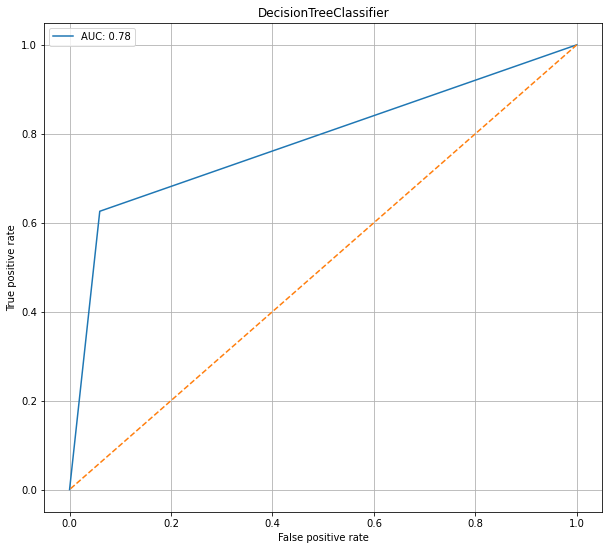

In [64]:
fpr,tpr,thresholds=roc_curve(y_test,clf_pred) # calculating fpr, tpr
rf_auc = auc(fpr, tpr) #Model Accuracy
plt.figure(figsize=(10,9)) #plotting the figure, size of 10*9
plt.plot(fpr, tpr, label = 'AUC: %0.2f' % rf_auc)
plt.plot([1,0],[1,0], linestyle = '--')
plt.legend(loc=0) #adding accuracy score at bottom right
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('DecisionTreeClassifier')
plt.grid() #adding the grid

In [65]:
import joblib
joblib.dump(clf.best_estimator_,"Census_Income_Project.obj")

['Census_Income_Project.obj']